## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [6]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [7]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [8]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [9]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [10]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

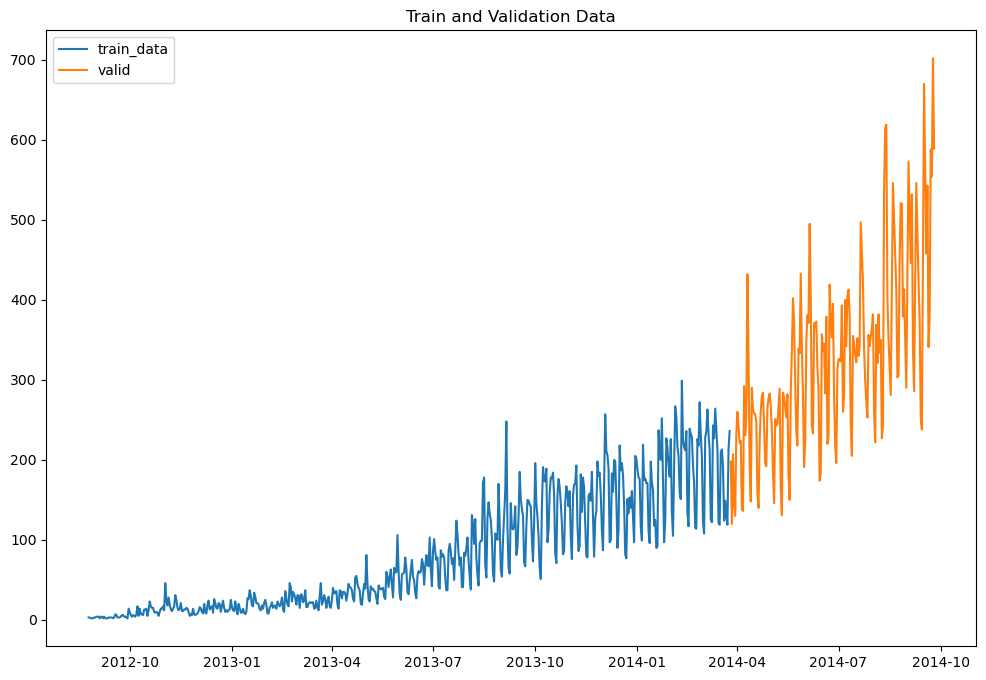

In [11]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

## Time Series Decomposition

<Figure size 2000x1500 with 0 Axes>

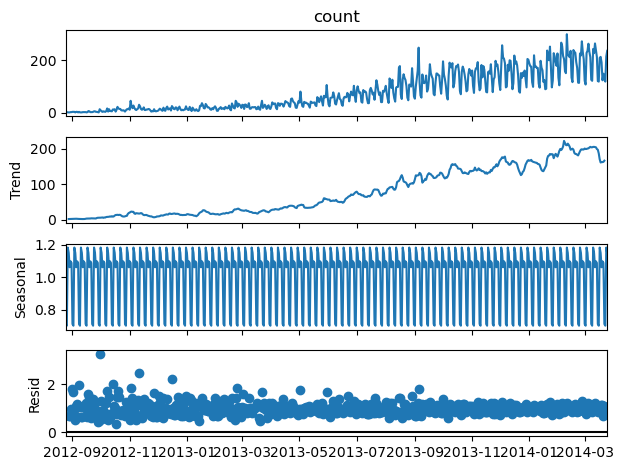

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(train_data['count'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(20,15))
result.plot()
plt.show()

In [12]:
RMSE_df = pd.DataFrame([0]*5, index= ['naive', 'average_complete', 'average_lastweek',\
                                      'moving_average', 'weighted_moving_average'], columns=["RMSE"])
RMSE_df 

,RMSE
naive,0
average_complete,0
average_lastweek,0
moving_average,0
weighted_moving_average,0


# Naive Model
Use the last (most recent) value of train as the predictions

In [8]:
print(train_data.shape)
train_data.tail()

(534, 2)


,Date,count
Date,,
2014-02-05,2014-02-05,254
2014-02-06,2014-02-06,216
2014-02-07,2014-02-07,205
2014-02-08,2014-02-08,159
2014-02-09,2014-02-09,151


In [11]:
# indexing starts from 0
train_data['count'][-1]  # last value in the training data

151

In [12]:
# Defining predictions for validation
valid_data['naive'] = train_data['count'][-1] 

In [13]:
valid_data.head()

,Date,count,naive
Date,,,
2014-02-09,2014-02-09,196,151
2014-02-10,2014-02-10,299,151
2014-02-11,2014-02-11,224,151
2014-02-12,2014-02-12,216,151
2014-02-13,2014-02-13,212,151


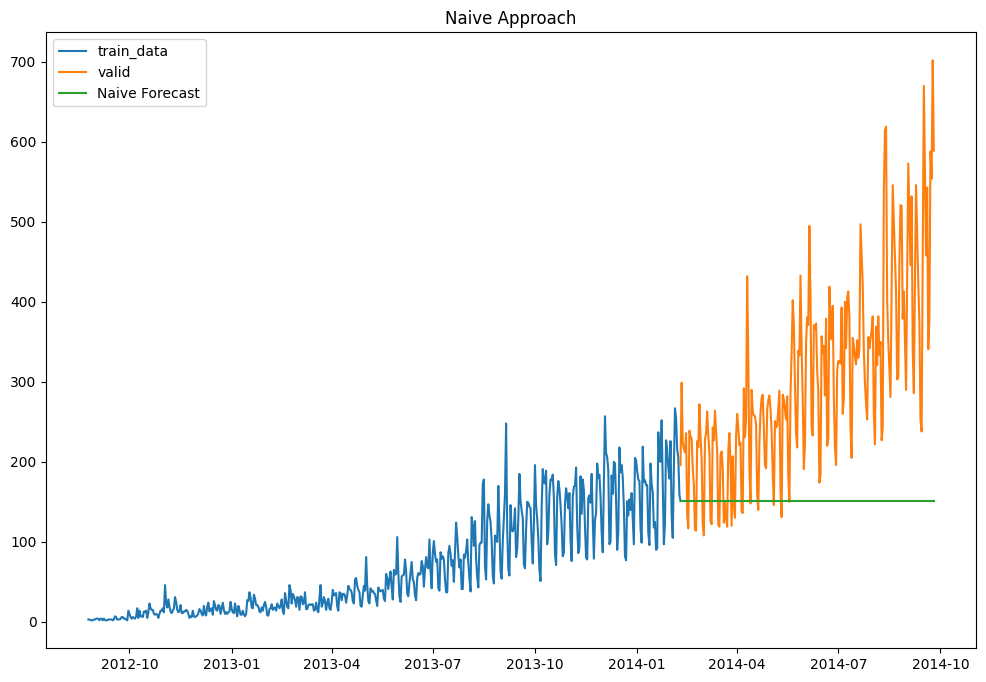

In [14]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [68]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 191.31604662004477


In [69]:
RMSE_df.loc["naive"] = rmse
RMSE_df

,RMSE
naive,191.316047
average_complete,0.000000
average_lastweek,0.000000
moving_average,0.000000
weighted_moving_average,0.000000


# Simple Average

Taking average of the complete data

In [16]:
train_data['count'].mean()

68.62734082397004

In [17]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['count'].mean()

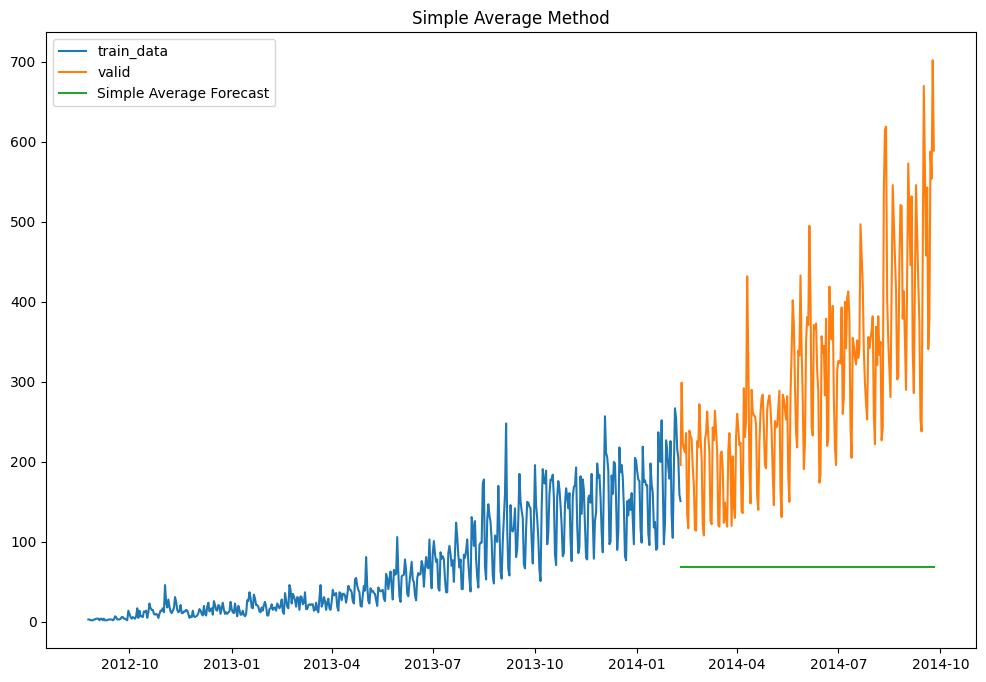

In [18]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [70]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 261.1243597659878


In [71]:
RMSE_df.loc["average_complete"] = rmse
RMSE_df

,RMSE
naive,191.316047
average_complete,261.124360
average_lastweek,0.000000
moving_average,0.000000
weighted_moving_average,0.000000


The initial values in the train data are smaller. Instead of taking the average of the complete data, we should take the average of only the recent values in order to make the predictions. 

In [20]:
train_data.tail(7)

,Date,count
Date,,
2014-02-03,2014-02-03,191
2014-02-04,2014-02-04,267
2014-02-05,2014-02-05,254
2014-02-06,2014-02-06,216
2014-02-07,2014-02-07,205
2014-02-08,2014-02-08,159
2014-02-09,2014-02-09,151


In [21]:
train_data.shape

(534, 2)

In [52]:
temp = (train_data['count'][-7:]).values
print('Lask week values are:', temp)
print('Average for last week is', temp.mean())

Lask week values are: [191 267 254 216 205 159 151]
Average for last week is 206.14285714285714


In [27]:
valid_data.head()

,Date,count,naive,average_complete
Date,,,,
2014-02-09,2014-02-09,196,151,68.627341
2014-02-10,2014-02-10,299,151,68.627341
2014-02-11,2014-02-11,224,151,68.627341
2014-02-12,2014-02-12,216,151,68.627341
2014-02-13,2014-02-13,212,151,68.627341


In [28]:
# Defining predictions for validation
valid_data['average_lastweek'] = temp.mean()

In [29]:
valid_data.head()

,Date,count,naive,average_complete,average_lastweek
Date,,,,,
2014-02-09,2014-02-09,196,151,68.627341,206.142857
2014-02-10,2014-02-10,299,151,68.627341,206.142857
2014-02-11,2014-02-11,224,151,68.627341,206.142857
2014-02-12,2014-02-12,216,151,68.627341,206.142857
2014-02-13,2014-02-13,212,151,68.627341,206.142857


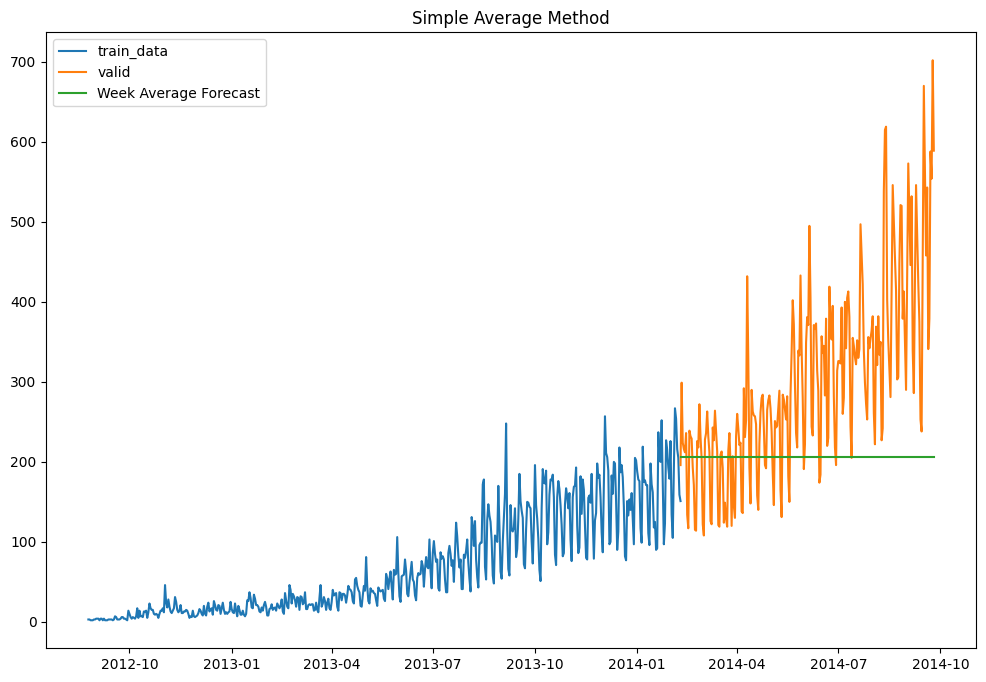

In [30]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_lastweek'], label='Week Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [72]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_lastweek']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 151.79405129208524


In [73]:
RMSE_df.loc["average_lastweek"] = rmse
RMSE_df

,RMSE
naive,191.316047
average_complete,261.124360
average_lastweek,151.794051
moving_average,0.000000
weighted_moving_average,0.000000


This is better than the last method. Here, instead of 7 days, you can take last 14 days, or 20 days and see which gives you more accurate results. Try it out at your end.

# Moving Average

We have a straight line here because same average value is predicted for all future points. We can change the 'last 7 days' value for each data point.

In [33]:
# list holding last seven values

valid_data['moving_average'] = 0
valid_data.tail()

,Date,count,naive,average_complete,average_lastweek,moving_average
Date,,,,,,
2014-09-21,2014-09-21,379,151,68.627341,206.142857,0
2014-09-22,2014-09-22,588,151,68.627341,206.142857,0
2014-09-23,2014-09-23,554,151,68.627341,206.142857,0
2014-09-24,2014-09-24,702,151,68.627341,206.142857,0
2014-09-25,2014-09-25,589,151,68.627341,206.142857,0


In [38]:
temp  # last 7 values in the train set

array([191, 267, 254, 216, 205, 159, 151], dtype=int64)

In [41]:
week_values = list(temp)
# [192, 124, 149, 129, 119, 214, 236]

In [42]:
for i in range(0,len(valid_data)):
    end = len(week_values)
    start = len(week_values)-7
    pred = mean(week_values[start:end])
    
    valid_data['moving_average'][i] = pred
    week_values.append(pred)

In [43]:
week_values

[191,
 267,
 254,
 216,
 205,
 159,
 151,
 206,
 208,
 199,
 192,
 188,
 186,
 190,
 195,
 194,
 192,
 191,
 190,
 191,
 191,
 192,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191,
 191

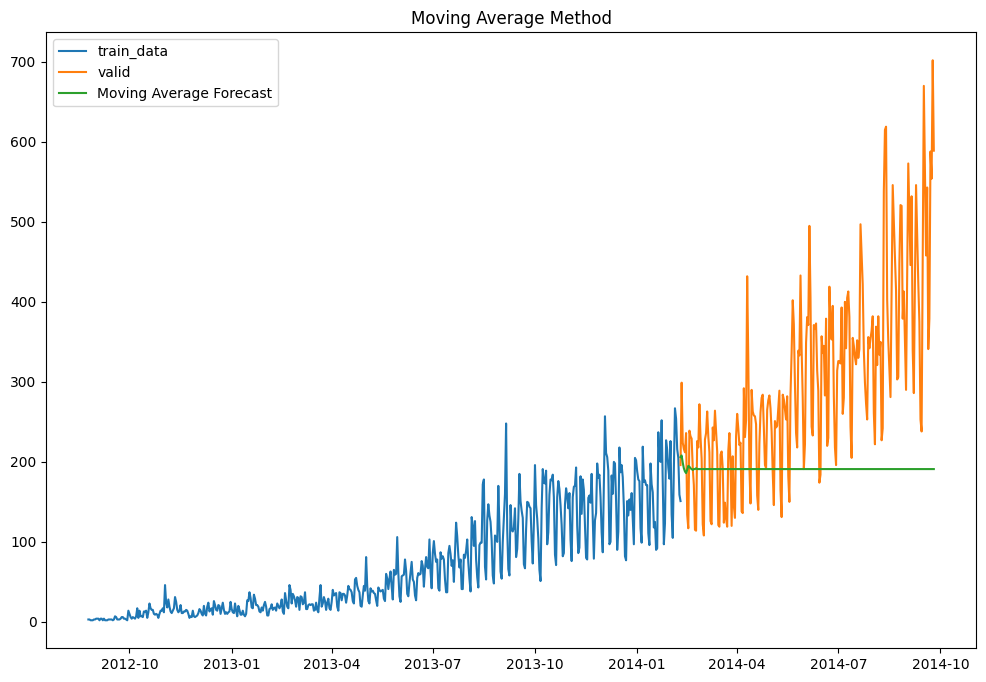

In [44]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [45]:
valid_data['moving_average'].head(25)

Date
2014-02-09    206
2014-02-10    208
2014-02-11    199
2014-02-12    192
2014-02-13    188
2014-02-14    186
2014-02-15    190
2014-02-16    195
2014-02-17    194
2014-02-18    192
2014-02-19    191
2014-02-20    190
2014-02-21    191
2014-02-22    191
2014-02-23    192
2014-02-24    191
2014-02-25    191
2014-02-26    191
2014-02-27    191
2014-02-28    191
2014-03-01    191
2014-03-02    191
2014-03-03    191
2014-03-04    191
2014-03-05    191
Name: moving_average, dtype: int64

In [74]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['moving_average']))
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 161.6998000231012


In [75]:
RMSE_df.loc["moving_average"] = rmse
RMSE_df

,RMSE
naive,191.316047
average_complete,261.124360
average_lastweek,151.794051
moving_average,161.699800
weighted_moving_average,0.000000


# Weighted Moving Average
Move the window and assign weights to the values in this window. I am taking higher weights to recent observations. Weights can be assigned manually or using a function.

In [51]:
train_data['count'][-7:]

Date
2014-02-03    191
2014-02-04    267
2014-02-05    254
2014-02-06    216
2014-02-07    205
2014-02-08    159
2014-02-09    151
Name: count, dtype: int64

In [53]:
# list holding last seven values and weights

week_values = train_data['count'][-7:].values
week_values = week_values.tolist()

weights = []
for i in range(1,8):
    W = i/8
    weights.append(W)

In [54]:
len(week_values), len(weights)

(7, 7)

In [55]:
valid_data.head()

,Date,count,naive,average_complete,average_lastweek,moving_average
Date,,,,,,
2014-02-09,2014-02-09,196,151,68.627341,206.142857,206
2014-02-10,2014-02-10,299,151,68.627341,206.142857,208
2014-02-11,2014-02-11,224,151,68.627341,206.142857,199
2014-02-12,2014-02-12,216,151,68.627341,206.142857,192
2014-02-13,2014-02-13,212,151,68.627341,206.142857,188


In [56]:
valid_data['weighted_moving_average'] = 0
valid_data.head()

,Date,count,naive,average_complete,average_lastweek,moving_average,weighted_moving_average
Date,,,,,,,
2014-02-09,2014-02-09,196,151,68.627341,206.142857,206,0
2014-02-10,2014-02-10,299,151,68.627341,206.142857,208,0
2014-02-11,2014-02-11,224,151,68.627341,206.142857,199,0
2014-02-12,2014-02-12,216,151,68.627341,206.142857,192,0
2014-02-13,2014-02-13,212,151,68.627341,206.142857,188,0


In [57]:
for i in range(0,len(valid_data)):
    
    end = len(week_values)
    start = len(week_values)-7
    
    final_values = week_values[start:end]
    
    weighted_values = 0
    for j, k in zip(weights,final_values):
        weighted_values += j*k
        
    weighted_mean = weighted_values/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    week_values.append(weighted_mean)

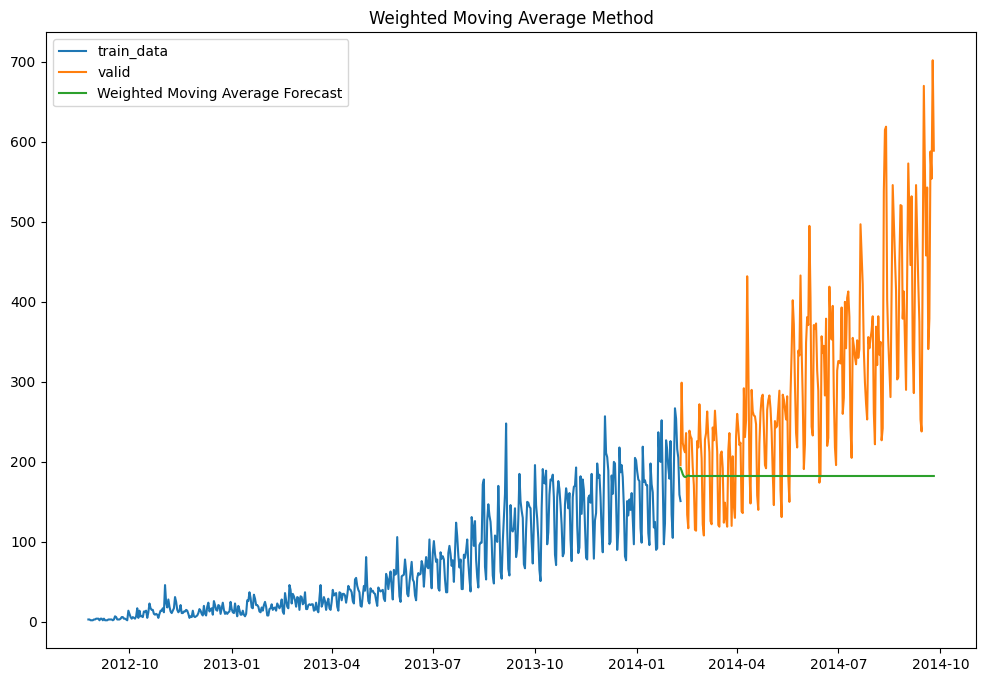

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [76]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['weighted_moving_average']))
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 167.7439710784861


In [78]:
RMSE_df.loc["weighted_moving_average"] = rmse
RMSE_df.round(2)

,RMSE
naive,191.32
average_complete,261.12
average_lastweek,151.79
moving_average,161.70
weighted_moving_average,167.74


In [83]:
RMSE_df.round(2)

,RMSE
naive,191.32
average_complete,261.12
average_lastweek,151.79
moving_average,161.70
weighted_moving_average,167.74


In [63]:
valid_data.head()

,Date,count,naive,average_complete,average_lastweek,moving_average,weighted_moving_average
Date,,,,,,,
2014-02-09,2014-02-09,196,151,68.627341,206.142857,206,192.392857
2014-02-10,2014-02-10,299,151,68.627341,206.142857,208,188.955357
2014-02-11,2014-02-11,224,151,68.627341,206.142857,199,184.608737
2014-02-12,2014-02-12,216,151,68.627341,206.142857,192,181.962771
2014-02-13,2014-02-13,212,151,68.627341,206.142857,188,181.133573


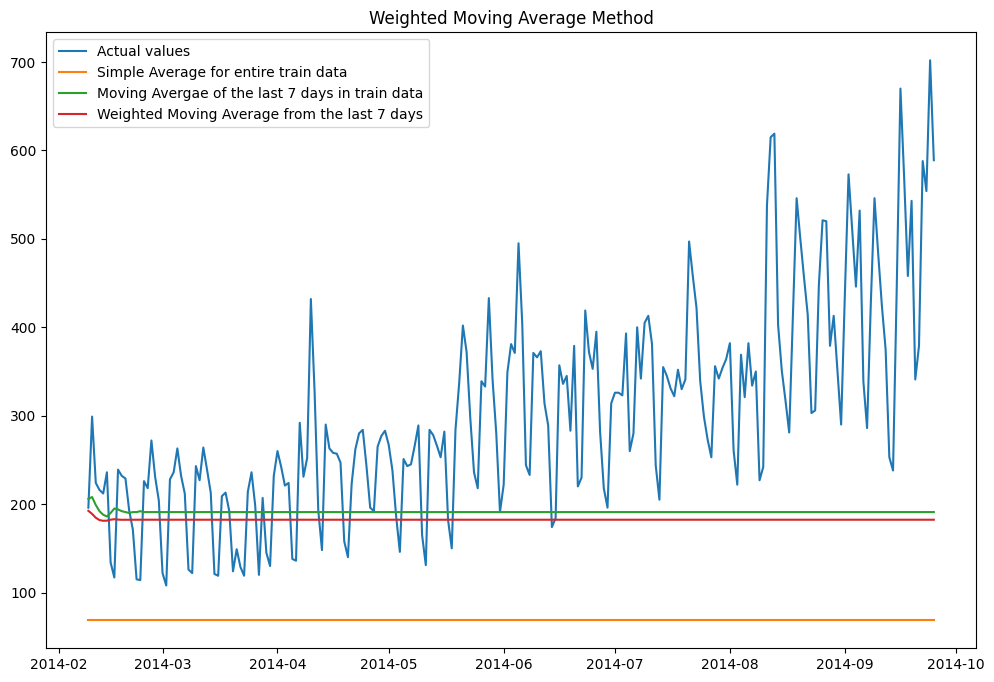

In [61]:
plt.figure(figsize=(12,8))

plt.plot(valid_data.index,valid_data['count'], label='Actual values')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average for entire train data')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Avergae of the last 7 days in train data')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average from the last 7 days')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [64]:
valid_data.columns 

Index(['Date', 'count', 'naive', 'average_complete', 'average_lastweek',
       'moving_average', 'weighted_moving_average'],
      dtype='object')